In [1]:
import json

from transformers import AutoModelForCausalLM, AutoTokenizer
import numpy as np
from pos_tagger import PosTagger
from attention_extraction import extract_all_attention, get_causal_selfattention_pattern
from matplotlib import pyplot as plt

from data_handling import load_tinystories_data

data = load_tinystories_data('../data/tinystories_val.txt')


model_url = 'roneneldan/TinyStories-1M'

model = AutoModelForCausalLM.from_pretrained(model_url, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_url)

pos_tagger = PosTagger(tokenizer)

with open('../probe-results/results_keys.json', 'r') as file:
    results_key = json.load(file) 

with open('../probe-results/results_queries.json', 'r') as file:
    results_query = json.load(file) 

c:\Users\Bruger\Code\mechinterp\mechinterp\Lib\site-packages\transformers\generation\configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(


In [2]:
from plotting import plot_probe_results_from_tag, plot_idx_of_highest_output, plot_selfattention_from_idx

In [3]:
folder = '../figures/case_studies/preverb_heads/'

## Pre Finite Verb

Layer 6, head 4 attends to previous finite verbs and is active on the token, where the next token will be a finite verb

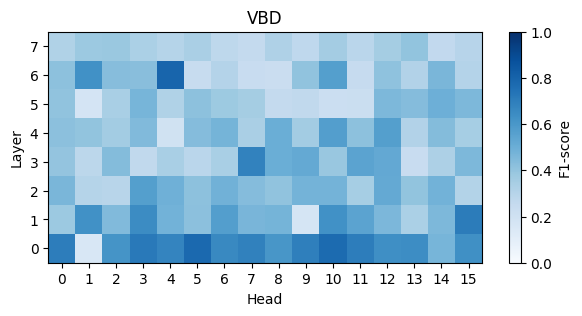

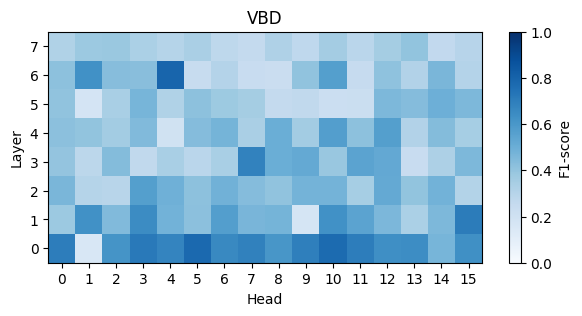

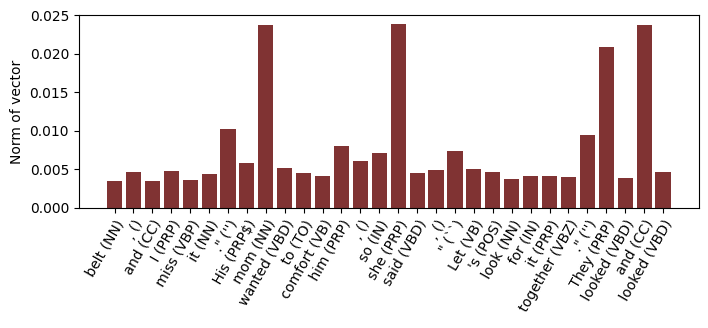

In [9]:
layer = 6
head = 4
input = data[10]

plot_probe_results_from_tag(results_key, 'VBD', cmap='Blues', outfile=folder + 'perverb_probe_VBD.pdf')
plot_probe_results_from_tag(results_key, 'VBD', cmap='Blues', outfile=folder + 'perverb_probe_VBD.png')

top_idx, fig, ax = plot_idx_of_highest_output(model, tokenizer, input, layer, head, pos_tagger, color=(0.5, 0.2, 0.2), outfile=folder + 'preverb_ativity.pdf')


for lab in ax.get_xticklabels():
    if lab.get_position()[0] in {8, 15, 26, 28}:
        lab.set_fontweight('bold')
        lab.set_fontsize(10)
    else:
        lab.set_fontsize(10)


fig.savefig(folder + 'preverb_ativity.pdf', bbox_inches='tight')
fig.savefig(folder + 'preverb_ativity.png', bbox_inches='tight')

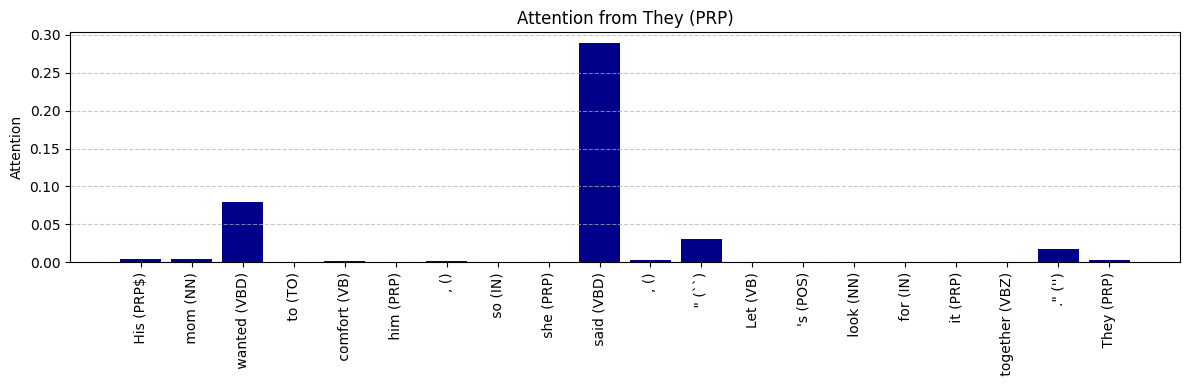

In [5]:


keys, queries, values = extract_all_attention(model, tokenizer, input)
attention = get_causal_selfattention_pattern(keys[layer][head], queries[layer][head])
tokens, tags, words = pos_tagger.tag_input(input, return_words=True)

fig, ax = plot_selfattention_from_idx(attention, words, tags, top_idx + 11, 20, color=(0.1, 0.2, 0.5), outfile=folder + 'preverb_attention.pdf')

# plot_selfattention_from_idx(attention, words, tags, top_idx + 13, 20, color=(0.1, 0.2, 0.5), outfile=folder + 'preverb_attention.pdf')

In [6]:
ax.get_xticklabels()

[Text(0, 0, ' His (PRP$)'),
 Text(1, 0, ' mom (NN)'),
 Text(2, 0, ' wanted (VBD)'),
 Text(3, 0, ' to (TO)'),
 Text(4, 0, ' comfort (VB)'),
 Text(5, 0, ' him (PRP)'),
 Text(6, 0, ', ()'),
 Text(7, 0, ' so (IN)'),
 Text(8, 0, ' she (PRP)'),
 Text(9, 0, ' said (VBD)'),
 Text(10, 0, ', ()'),
 Text(11, 0, ' " (``)'),
 Text(12, 0, 'Let (VB)'),
 Text(13, 0, "'s (POS)"),
 Text(14, 0, ' look (NN)'),
 Text(15, 0, ' for (IN)'),
 Text(16, 0, ' it (PRP)'),
 Text(17, 0, ' together (VBZ)'),
 Text(18, 0, '." (\'\')'),
 Text(19, 0, ' They (PRP)')]

In [7]:
for lab in ax.get_xticklabels():
    if lab.get_position()[0] in {2, 9}:
        lab.set_fontweight('bold')
        lab.set_fontsize(10)
    else:
        lab.set_fontsize(10)

In [8]:
fig.savefig(folder + 'preverb_attention.pdf', bbox_inches='tight')
fig.savefig(folder + 'preverb_attention.png', bbox_inches='tight')

## Pre infinite verb

This one is not as clean :(

Layer 5, head 7 attends to previous finite verbs and is active on the token, where the next token will be a finite verb

In [ ]:
# layer = 5
# head = 7
# input = data[15]

# plot_probe_results_from_tag(results_key, 'VB', cmap='Blues')
# plot_probe_results_from_tag(results_query, 'TO', cmap='Reds')

# top_idx = plot_idx_of_highest_output(model, tokenizer, input, layer, head, pos_tagger)

# keys, queries, values = extract_all_attention(model, tokenizer, input)
# attention = get_causal_selfattention_pattern(keys[layer][head], queries[layer][head])
# tokens, tags, words = pos_tagger.tag_input(input, return_words=True)

# plot_selfattention_from_idx(attention, words, tags, top_idx, 40)